# Seattle Airbnb reviews

## The aim of the project is to use NLP and text analytics to answer the following questions: 

1. Are the majority of people who use Airbnb's services in Seattle happy with their stay or not?
2. Which were the top 5 houses listed on Airbnb according to the reviews?
3. What are the most popular words in Airbnb seattle reviews?

In [3]:
# importing libraries and dependancies: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('commedy_comment.csv'
                        ,encoding='latin1'
                        
                        #, cyrillic encoding='latin1'
                       )
#pd.read_csv('commedy_comment.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ismayiltahmazov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Here after importing the libraries I'll explore the data to the see the various datatypes and drop rows with missing values (if any)

In [4]:
data.head()

,video_id,comment
0,v8ScRl7rWQQ,"""Started in theater.....Ended in theater!"" HAH..."
1,v8ScRl7rWQQ,Thomas Jefferson had a kid out of wedlock with...
2,v8ScRl7rWQQ,"pretty good, we need more uploads steve!"
3,v8ScRl7rWQQ,Thankyou(:!! & also thankyou for coming to Bul...
4,v8ScRl7rWQQ,From now on when I say first on a new video I ...


In [5]:
data.shape

(518, 2)

In [6]:
data = data.dropna()

In [7]:
data.shape

(518, 2)

Since only a few rows (18) had missing data, I found it better to drop those and work on the remaining data

In [8]:
data.dtypes

video_id    object
comment     object
dtype: object

In [10]:
data['comment'].head()

0    "Started in theater.....Ended in theater!" HAH...
1    Thomas Jefferson had a kid out of wedlock with...
2             pretty good, we need more uploads steve!
3    Thankyou(:!! & also thankyou for coming to Bul...
4    From now on when I say first on a new video I ...
Name: comment, dtype: object

In [11]:
# calling the function
sia = SentimentIntensityAnalyzer()

In [13]:
data['negative'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['neg'])
data['neutral'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['neu'])
data['positive'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['pos'])
data['compound'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['compound'])

In [14]:
data.head()

,video_id,comment,negative,neutral,positive,compound
0,v8ScRl7rWQQ,"""Started in theater.....Ended in theater!"" HAH...",0.0,0.393,0.607,0.8283
1,v8ScRl7rWQQ,Thomas Jefferson had a kid out of wedlock with...,0.0,1.000,0.000,0.0000
2,v8ScRl7rWQQ,"pretty good, we need more uploads steve!",0.0,0.439,0.561,0.7500
3,v8ScRl7rWQQ,Thankyou(:!! & also thankyou for coming to Bul...,0.0,0.711,0.289,0.6671
4,v8ScRl7rWQQ,From now on when I say first on a new video I ...,0.0,1.000,0.000,0.0000


## Finding the percentage of positive, negative and neutral reviews : 

Reviews with less than -0.4 sentiment are taken as negative reviews. Sentiment of polarity greater than 0.4 is positive and anything in between -0.4 and 0.4 is neutral sentiment.

In [15]:
# Counting the positive, negative and neutral reviews : 

positive_reviews = np.sum(i > 0.4 for i in data['compound'])
neutral_reviews = np.sum(-0.4 < i < 0.4 for i in data['compound'])
negative_reviews = np.sum(i < -0.4 for i in data['compound'])
n = len(data['compound'])

/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


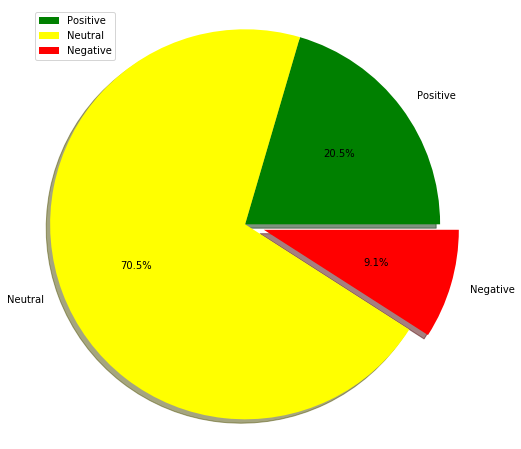

In [16]:
# Visualizing the percentage of positive, negative and neutral reviews : 
# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [(positive_reviews * 100)/n, (neutral_reviews * 100)/n, (negative_reviews * 100)/n]
colors = ['green', 'yellow', 'red']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize =(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal') #Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.show()

## Top 5 houses listed on Airbnb seattle according to reviews in 2015: 

In order to calculate this I grouped the compound sentiment polarity ratings by their listing IDs

In order to answer this I decided to create a word cloud

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [21]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in data['comment'])

In [22]:
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 29442 words in the combination of all reviews.


In [23]:
# Generating a wordcloud image: 
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100).generate(text)

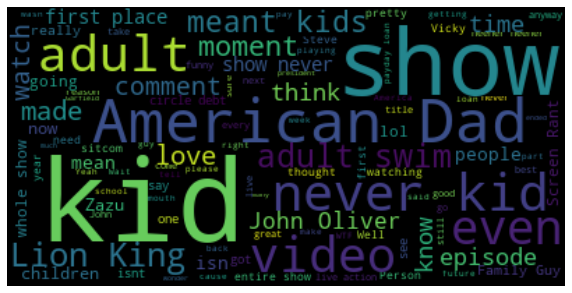

In [24]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()